# Oblig 1

#### Oppgave 1.

Vi skal se på to uniformt fordelte ringladninger med radius 2 og ladning 2 og -2.

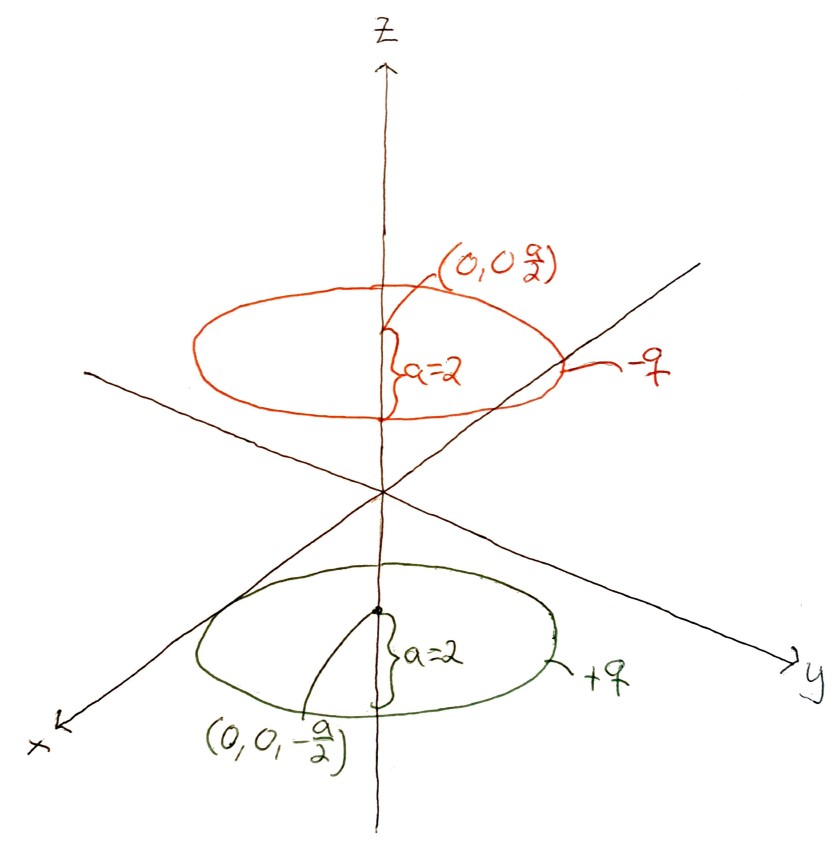

Skissen viser to ringladninger. Den øverste ringen har ladning $-q=-2$, radius $a=2$ og sentrum i $\big(0,0,\frac{a}{2}\big)$. Den nederste ringen har ladning $q=2$, radius $a=2$ og sentrum i $\big(0,0,-\frac{a}{2}\big)$.

#### Oppgave 2.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def potential(r, Q, R):
    '''Funksjonen regner ut det elektriske potensialet i ett punkt'''
    V = 0.
    for i in range(len(R)):
        Ri = r - R[i]
        Qi = Q[i]
        Rinorm = np.linalg.norm(Ri)
        V = V + Qi/Rinorm
    return V

# Tomme lister til å fylles med posisjoner og ladninger
Q1 = []
R1 = []
Q2 = []
R2 = []
M = 100 # antall biter av ringen
a = 2. # radius til ringene
q1 = 1. # ladning til ring 1
q2 = -1. # ladning til ring 2
delta_theta = 2*np.pi/M # theta=[0,...,2pi] , deler opp theta i M deler

def make_ring(Q_list, R_list, z_pos, q_no):
    '''Lager ringene'''
    for i in range(M):
        thetai = i*delta_theta
        ri = np.array([a*np.cos(thetai), a*np.sin(thetai), z_pos])
        R_list.append(ri)
        Qi = q_no/M
        Q_list.append(Qi)

# kaller på funksjonen som lager ringene
make_ring(Q1, R1, -1, q1)
make_ring(Q2, R2, 1, q2)

# Lager griddet
L = 4
N = 40 # antall løsningspunkter
y = np.linspace(-L,L,N)
z = np.linspace(-L,L,N)
ry, rz = np.meshgrid(y,z)

V = np.zeros((N,N),float)
for i in range(len(ry.flat)):
    '''Henter posisjoner og løser for dem ved hjelp av funksjonen potential'''
    r = np.array([0, ry.flat[i], rz.flat[i]])
    V.flat[i] = potential(r,Q1,R1) + potential(r, Q2, R2) # bruker superposisjonsprinsippet og summerer bidragene

Vi kan finne det elektriske feltet ved å løse<br>
$\vec{E}=-\nabla V$<br>
Dette kan vi gjøre, ettersom at det elektriske feltet er konservativt.

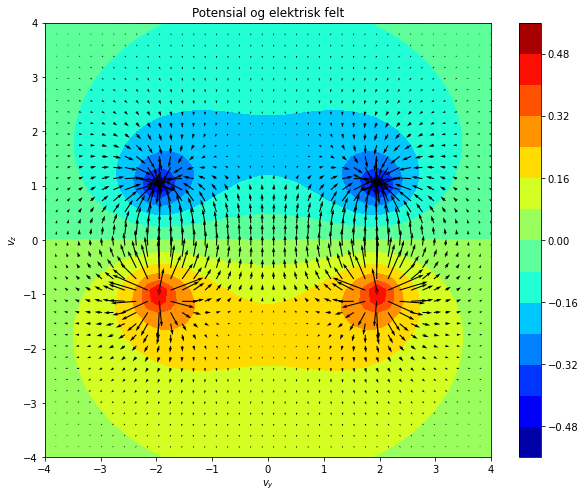

In [2]:
Ez,Ey = np.gradient(-V)
plt.figure(figsize=(10,8))
plt.title('Potensial og elektrisk felt')
plt.xlabel('$v_y$')
plt.ylabel('$v_z$')
contour = plt.contourf(ry,rz,V, cmap='jet', levels=15)
plt.quiver(ry,rz,Ey,Ez)
plt.colorbar(contour)

Plottet viser et tverrsnitt i yz-planet, med de to ringladningene over og under z-aksen. Det elektriske feltet strømmer ut fra den positivt ladde ringen og inn mot den negativt ladde. Det elektriske potensialet er stort når vi er veldig nærme en av ladningene, og avtar jo lenger bort fra ladningene vi kommer. 

Kan vi si noe om hvordan dette potensialet oppfører seg om vi beveger oss langt bort fra det?

# Sammenlikning med dipol

For en dipol er potensialet beskrevet som<br>
$$V(\vec{r})=\frac{\vec{p}\cdot\vec{r}}{4\pi\epsilon_0r^3}$$

I vårt tilfelle er $\vec{p}=Q\vec{d}=Q(0,0,a)$

Vi vet at for en dipol, vil det elekstriske potensialet være proposjonalt med $\frac{1}{r^2}$, hvor $r$ er avstanden fra et punkt til dipolen. La oss se på et punkt langt unna sentrum av ringladningene i xyz-retning.

In [3]:
d = 2. # avstanden mellom ringenes sentrum
x = np.linspace(d/2+0.001, 1000, 10000)
y = x
z = x

Vs = np.zeros(x.shape) # tom array som skal fylles med potensialet
for i in range(len(x)):
    r = np.array([-x[i], -y[i], -z[i]])
    Vs1 = potential(r, Q1, R1)
    Vs2 = potential(r, Q2, R2)
    Vs[i] = Vs1+Vs2 #bruker her superposisjonsprinsippet

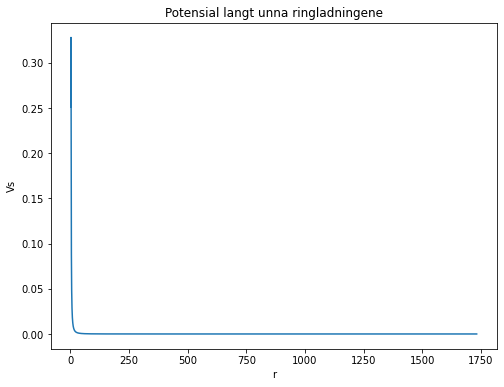

In [4]:
r = np.sqrt(x**2+y**2+z**2)

plt.figure(figsize=(8,6))
plt.title('Potensial langt unna ringladningene')
plt.xlabel('r')
plt.ylabel('Vs')
plt.plot(r, Vs)

På plottet kan vi se at potensialet synker veldig fort langt unna ladningene. For å kunne visualisere dette bedre, kan vi plotte $r$ og $Vs$ logaritmisk. Det fungerer på denne måten:

$Vs=ar^b\\
log_{10}(Vs)=log_{10}(ar^b)\\
log_{10}(Vs)=log_{10}(a)+log_{10}(r^b)\\
log_{10}(Vs)=log_{10}(a)+b\cdot log_{10}(r)$

Det vi er ute etter er altså $b$, som svarer til stigningen til linja.

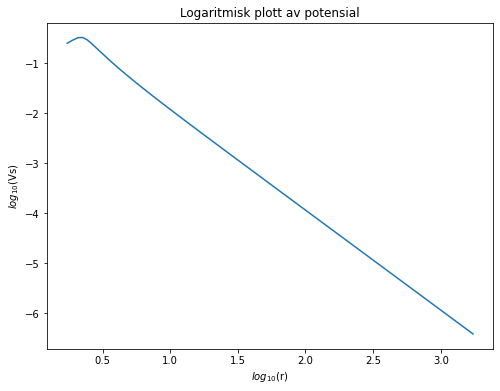

In [5]:
rlog = np.log10(r)
Vlog = np.log10(Vs)

plt.figure(figsize=(8,6))
plt.title('Logaritmisk plott av potensial')
plt.xlabel('$log_{10}$(r)')
plt.ylabel('$log_{10}$(Vs)')
plt.plot(rlog, Vlog)

Vi kan finne $b$ ved hjelp av numpy sin polyfit, som gir oss det beste tilpassede 1. gradspolynomet til den rette linja. Den returnerer stigningstallet og konstantleddet.

In [6]:
p = np.polyfit(rlog, Vlog, 1)
print(p)

[-2.00358137  0.07284887]


Som vi ser her, er stigningstallet $-2.0$. Dette er konsistent med at en dipol er proposjonal med $\frac{1}{r^2}$.